In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
num_classes = 2

model = Sequential([ 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
from zipfile import ZipFile
file_name = "/content/brain_tumor_dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # set validation split

train_set = train_datagen.flow_from_directory(
    '/content/brain_tumor_dataset',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    subset='training') # set as training data

test_set = train_datagen.flow_from_directory(
    '/content/brain_tumor_dataset', # same directory as training data
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    subset='validation') 

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [8]:
from tensorflow.keras.utils import to_categorical 

nb_train_samples = len(train_set.filenames) 
num_classes = len(train_set.class_indices) 
 
# get the class labels for the training data, in the original order 
train_labels = train_set.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

nb_test_samples = len(test_set.filenames) 
num_classes = len(test_set.class_indices) 
 
# get the class labels for the test data, in the original order 
test_labels = test_set.classes 
 
# convert the test labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [9]:
from tensorflow.keras.preprocessing import image

labels = ['0','1']
class_names = ['No Brain Tumor','Brain Tumor']

print(class_names)
print(train_labels[20])

set_label = ""

for i in range(0,2):
    if train_labels[20][i]==1:
        set_label= set_label+class_names[i]
print(set_label)

['No Brain Tumor', 'Brain Tumor']
[1. 0.]
No Brain Tumor


Found 203 images belonging to 2 classes.


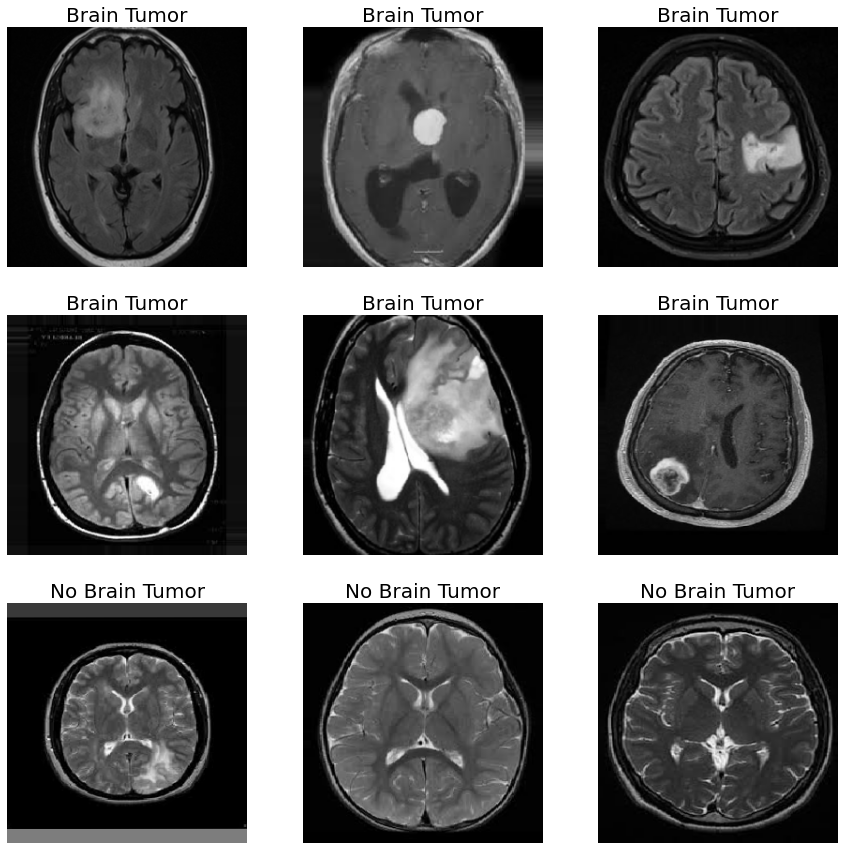

In [10]:
#checking train labels and images randomly

import matplotlib.pyplot as plt

train_set_check = train_datagen.flow_from_directory('/content/brain_tumor_dataset',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode='sparse', shuffle=True, subset='training')

plt.figure(figsize=(15, 15))
batch=next(train_set_check)  

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img=batch[0][i]                            
    plt.imshow(img)
    lab = int(batch[1][i])
    plt.title(class_names[lab], fontsize=20)
    plt.axis("off")

In [11]:
epochs=50
history = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=epochs,
)

model.save('model_1.h5') 

Epoch 1/50
13/13 [==============================] - 7s 377ms/step - loss: 0.9276 - accuracy: 0.6355 - val_loss: 0.5757 - val_accuracy: 0.7600
Epoch 2/50
13/13 [==============================] - 4s 344ms/step - loss: 0.5696 - accuracy: 0.6798 - val_loss: 0.6974 - val_accuracy: 0.6800
Epoch 3/50
13/13 [==============================] - 5s 353ms/step - loss: 0.6374 - accuracy: 0.7044 - val_loss: 0.5841 - val_accuracy: 0.7000
Epoch 4/50
13/13 [==============================] - 5s 350ms/step - loss: 0.5076 - accuracy: 0.7734 - val_loss: 0.4735 - val_accuracy: 0.7000
Epoch 5/50
13/13 [==============================] - 4s 348ms/step - loss: 0.5181 - accuracy: 0.7783 - val_loss: 0.5549 - val_accuracy: 0.7000
Epoch 6/50
13/13 [==============================] - 4s 344ms/step - loss: 0.4828 - accuracy: 0.7783 - val_loss: 0.5105 - val_accuracy: 0.7800
Epoch 7/50
13/13 [==============================] - 4s 347ms/step - loss: 0.4849 - accuracy: 0.7931 - val_loss: 0.5085 - val_accuracy: 0.7800
Epoch 

<Figure size 432x288 with 0 Axes>

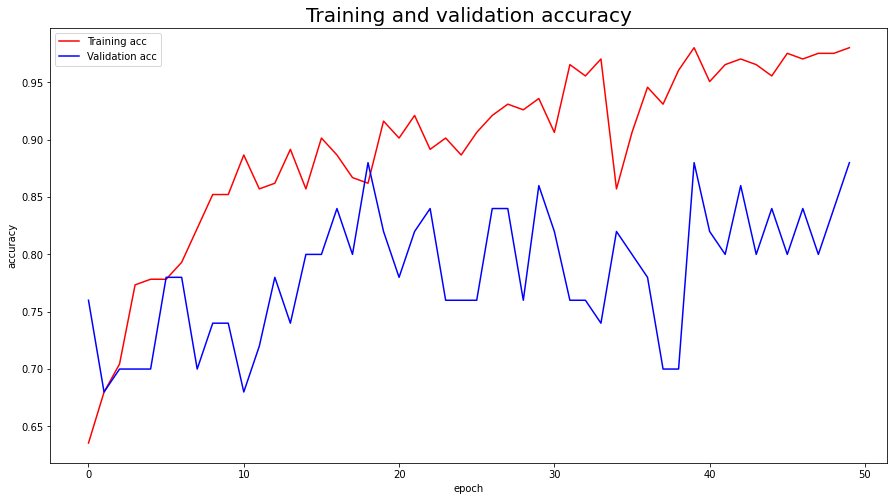

<Figure size 432x288 with 0 Axes>

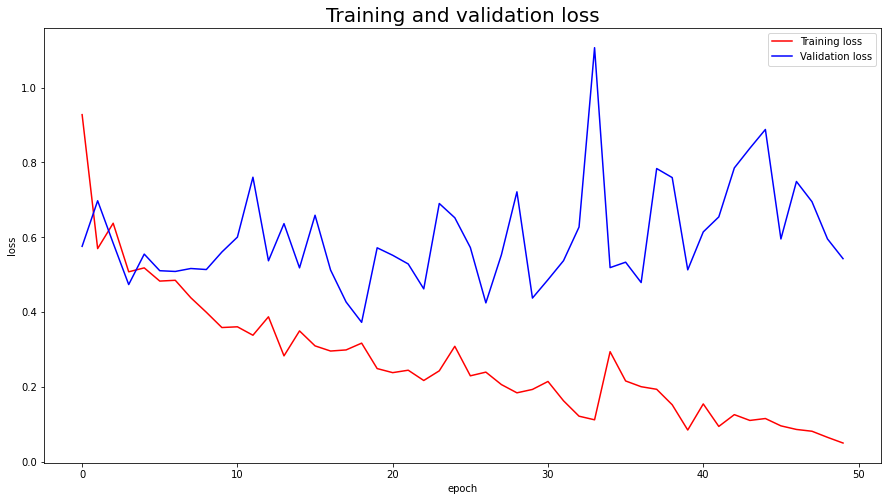

<Figure size 432x288 with 0 Axes>

In [12]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 8))

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', fontsize=20)
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()


plt.figure(figsize=(15, 8))

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', fontsize=20)
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.figure()

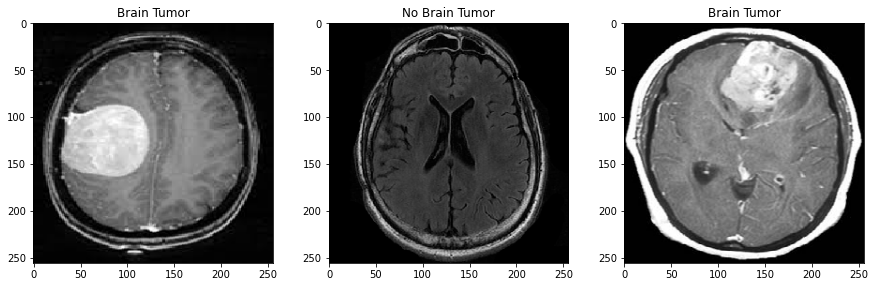

In [13]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


img1 = image.load_img('/content/1.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)

scores = np.exp(predictions[0])/np.sum(np.exp(predictions[0]))  

#print(predictions[0])
#print(scores)
#print(class_names[np.argmax(scores)])

predict_label = labels[np.argmax(scores)]
#print(predict_label)
value = float(scores[int(predict_label)]*100)

name_1 = class_names[int(predict_label)]

#img2
img2 = image.load_img('/content/2.jpg', target_size=(256, 256))
img = image.img_to_array(img2)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
predictions = model.predict(img)

scores = np.exp(predictions[0])/np.sum(np.exp(predictions[0]))  
predict_label = labels[np.argmax(scores)]
value = float(scores[int(predict_label)]*100)

name_2 = class_names[int(predict_label)]

#img3
img3 = image.load_img('/content/3.jpg', target_size=(256, 256))
img = image.img_to_array(img3)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)
scores = np.exp(predictions[0])/np.sum(np.exp(predictions[0]))  
predict_label = labels[np.argmax(scores)]

value = float(scores[int(predict_label)]*100)
name_3 = class_names[int(predict_label)]

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.title(name_1)
plt.imshow(img1)


plt.subplot(3, 3, 2)
plt.title(name_2)
plt.imshow(img2)


plt.subplot(3, 3, 3)
plt.title(name_3)
plt.imshow(img3)

In [15]:
import pandas as pd
test_set.reset

classes = test_set.classes
prediction = model.predict(test_set)

#print(prediction[0])
#print(len(prediction))

test_scores = np.exp(prediction)/np.sum(np.exp(prediction))  

#print(len(test_scores))
predict_labels = []

for i in range(0,len(test_scores)):
    x = np.argmax(test_scores[i])
    predict_labels.append(labels[x])

#print(predict_labels[0])    
#print(len(labels))    

df = pd.DataFrame({
   'filename': test_set.filenames,
   'original': classes,
   'predict' : predict_labels,
})

In [28]:
print("Last 5 Images")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.tail(5)

Last 5 Images


,filename,original,predict
45,yes/Y148.JPG,1,1
46,yes/Y15.jpg,1,1
47,yes/Y153.jpg,1,1
48,yes/Y154.jpg,1,1
49,yes/Y155.JPG,1,1


In [33]:
x1 = model.evaluate(train_set)
x2 = model.evaluate(test_set)

print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

4/4 [==============================] - 1s 187ms/step - loss: 0.5625 - accuracy: 0.8800
Training Accuracy  : 96.55%     Training loss  : 0.083053
Validation Accuracy: 88.00%     Validation loss: 0.562519
